In [ ]:
specific = True

folder_path = "clean_loop/no_mod"
if specific:
    paths = ["privacy/no_mod_10", "privacy/no_mod_25", "privacy/no_mod_50", "privacy/no_mod_80"]
    # paths = ["personalization/no_mod_10", "personalization/no_mod_25", "personalization/no_mod_50", "personalization/no_mod_80"]
save_path = "privacy/no_mod"
# save_path = "personalization/no_mod"

save = True

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors
import re
import numpy as np
from matplotlib.ticker import PercentFormatter

In [10]:
files = [f for f in os.listdir(folder_path) if f.endswith('_metrics.csv')]
dfs = []

for file in files:
    filename = os.path.splitext(file)[0]  # remove .csv
    parts = filename.split('_')
    if len(parts) >= 3:
        algorithm = parts[0]
        dataset = parts[1]
    else:
        continue  # skip if filename doesn't match pattern

    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)

    df['algorithm'] = algorithm.upper()
    df['dataset'] = dataset

    dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)

In [11]:
if specific:
    specific_df = pd.DataFrame()
    for specific_path in paths:
        folder_path = specific_path

        files = [f for f in os.listdir(folder_path) if f.endswith('_metrics.csv')]

        dfs = []

        for file in files:
            filename = os.path.splitext(file)[0]  # remove .csv
            parts = filename.split('_')
            if len(parts) >= 3:
                algorithm = parts[0]
                dataset = parts[1]
            else:
                continue  # skip if filename doesn't match pattern

            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)

            df['algorithm'] = algorithm.upper()
            df['dataset'] = dataset
            dfs.append(df)

        merged_df_ex = pd.concat(dfs, ignore_index=True)

        merged_df_ex['delta'] = merged_df_ex['value'] - merged_df['value']

        merged = merged_df_ex.merge(
            merged_df,
            on=['key', 'algorithm', 'dataset'],
            suffixes=('_ex', '_ref')
        )

        # Obliczenie różnicy
        merged['delta'] = merged['value_ex'] - merged['value_ref']
        merged['percent_delta'] = (merged['delta'] / merged['value_ref'])
        merged['percent_delta'] = merged['percent_delta'].fillna(0)
        merged['percent_delta'] = merged['percent_delta'].replace([np.inf], 1)

        match = re.search(r'\d+', specific_path)
        if match:
            number = int(match.group())
        merged['percent'] = number
        
        specific_df = pd.concat([specific_df, merged], ignore_index=True)
    specific_df['percent'] = specific_df['percent'].astype(str) + '%'


In [12]:
specific_df

,key,value_ex,algorithm,dataset,delta,value_ref,percent_delta,percent
0,precision,0.000000,CBF,amazonsales,0.000000,0.000000,0.000000,10%
1,precision_at_k,0.025000,CBF,amazonsales,0.000000,0.025000,0.000000,10%
2,recall,0.000000,CBF,amazonsales,0.000000,0.000000,0.000000,10%
3,recall_at_k,0.025000,CBF,amazonsales,0.000000,0.025000,0.000000,10%
4,mae,1.435999,CBF,amazonsales,-0.005311,1.441310,-0.003685,10%
...,...,...,...,...,...,...,...,...
463,user_coverage,0.065217,RL,postrecommendations,0.021739,0.043478,0.500000,80%
464,item_coverage,0.002244,RL,postrecommendations,0.000748,0.001496,0.500000,80%
465,personalization,0.987817,RL,postrecommendations,-0.000717,0.988533,-0.000725,80%
466,intra_list_similarity,0.017131,RL,postrecommendations,-0.091680,0.108811,-0.842564,80%


In [13]:
specific_df[specific_df['key'] == 'precision']

,key,value_ex,algorithm,dataset,delta,value_ref,percent_delta,percent
0,precision,0.000000,CBF,amazonsales,0.000000,0.000000,0.000000,10%
13,precision,0.060345,CBF,movielens,0.060345,0.000000,1.000000,10%
26,precision,0.021739,CBF,postrecommendations,-0.010450,0.032189,-0.324638,10%
39,precision,0.000000,CF,amazonsales,0.000000,0.000000,0.000000,10%
52,precision,0.250000,CF,movielens,0.000000,0.250000,0.000000,10%
65,precision,0.000000,CF,postrecommendations,0.000000,0.000000,0.000000,10%
78,precision,0.025000,RL,amazonsales,-0.025000,0.050000,-0.500000,10%
91,precision,0.008696,RL,movielens,-0.008696,0.017391,-0.500000,10%
104,precision,0.032609,RL,postrecommendations,-0.010870,0.043478,-0.250000,10%
117,precision,0.000000,CBF,amazonsales,0.000000,0.000000,0.000000,25%


FileNotFoundError: [Errno 2] No such file or directory: 'personalization/no_mod/fig/           key  value_ex algorithm              dataset     delta  value_ref  \\\n0    precision  0.000000       CBF          amazonsales  0.000000   0.000000   \n13   precision  0.060345       CBF            movielens  0.060345   0.000000   \n26   precision  0.021739       CBF  postrecommendations -0.010450   0.032189   \n39   precision  0.000000        CF          amazonsales  0.000000   0.000000   \n52   precision  0.250000        CF            movielens  0.000000   0.250000   \n65   precision  0.000000        CF  postrecommendations  0.000000   0.000000   \n78   precision  0.025000        RL          amazonsales -0.025000   0.050000   \n91   precision  0.008696        RL            movielens -0.008696   0.017391   \n104  precision  0.032609        RL  postrecommendations -0.010870   0.043478   \n117  precision  0.000000       CBF          amazonsales  0.000000   0.000000   \n130  precision  0.060345       CBF            movielens  0.060345   0.000000   \n143  precision  0.000000       CBF  postrecommendations -0.032189   0.032189   \n156  precision  0.000000        CF          amazonsales  0.000000   0.000000   \n169  precision  0.250000        CF            movielens  0.000000   0.250000   \n182  precision  0.000000        CF  postrecommendations  0.000000   0.000000   \n195  precision  0.050000        RL          amazonsales  0.000000   0.050000   \n208  precision  0.008696        RL            movielens -0.008696   0.017391   \n221  precision  0.000000        RL  postrecommendations -0.043478   0.043478   \n234  precision  0.000000       CBF          amazonsales  0.000000   0.000000   \n247  precision  0.051724       CBF            movielens  0.051724   0.000000   \n260  precision  0.000000       CBF  postrecommendations -0.032189   0.032189   \n273  precision  0.000000        CF          amazonsales  0.000000   0.000000   \n286  precision  0.250000        CF            movielens  0.000000   0.250000   \n299  precision  0.000000        CF  postrecommendations  0.000000   0.000000   \n312  precision  0.100000        RL          amazonsales  0.050000   0.050000   \n325  precision  0.008696        RL            movielens -0.008696   0.017391   \n338  precision  0.119565        RL  postrecommendations  0.076087   0.043478   \n351  precision  0.000000       CBF          amazonsales  0.000000   0.000000   \n364  precision  0.051724       CBF            movielens  0.051724   0.000000   \n377  precision  0.000000       CBF  postrecommendations -0.032189   0.032189   \n390  precision  0.000000        CF          amazonsales  0.000000   0.000000   \n403  precision  0.250000        CF            movielens  0.000000   0.250000   \n416  precision  0.000000        CF  postrecommendations  0.000000   0.000000   \n429  precision  0.100000        RL          amazonsales  0.050000   0.050000   \n442  precision  0.000000        RL            movielens -0.017391   0.017391   \n455  precision  0.065217        RL  postrecommendations  0.021739   0.043478   \n\n     percent_delta percent                      combo  \n0         0.000000     10%          CBF - amazonsales  \n13        1.000000     10%            CBF - movielens  \n26       -0.324638     10%  CBF - postrecommendations  \n39        0.000000     10%           CF - amazonsales  \n52        0.000000     10%             CF - movielens  \n65        0.000000     10%   CF - postrecommendations  \n78       -0.500000     10%           RL - amazonsales  \n91       -0.500000     10%             RL - movielens  \n104      -0.250000     10%   RL - postrecommendations  \n117       0.000000     25%          CBF - amazonsales  \n130       1.000000     25%            CBF - movielens  \n143      -1.000000     25%  CBF - postrecommendations  \n156       0.000000     25%           CF - amazonsales  \n169       0.000000     25%             CF - movielens  \n182       0.000000     25%   CF - postrecommendations  \n195       0.000000     25%           RL - amazonsales  \n208      -0.500000     25%             RL - movielens  \n221      -1.000000     25%   RL - postrecommendations  \n234       0.000000     50%          CBF - amazonsales  \n247       1.000000     50%            CBF - movielens  \n260      -1.000000     50%  CBF - postrecommendations  \n273       0.000000     50%           CF - amazonsales  \n286       0.000000     50%             CF - movielens  \n299       0.000000     50%   CF - postrecommendations  \n312       1.000000     50%           RL - amazonsales  \n325      -0.500000     50%             RL - movielens  \n338       1.750000     50%   RL - postrecommendations  \n351       0.000000     80%          CBF - amazonsales  \n364       1.000000     80%            CBF - movielens  \n377      -1.000000     80%  CBF - postrecommendations  \n390       0.000000     80%           CF - amazonsales  \n403       0.000000     80%             CF - movielens  \n416       0.000000     80%   CF - postrecommendations  \n429       1.000000     80%           RL - amazonsales  \n442      -1.000000     80%             RL - movielens  \n455       0.500000     80%   RL - postrecommendations  .png'

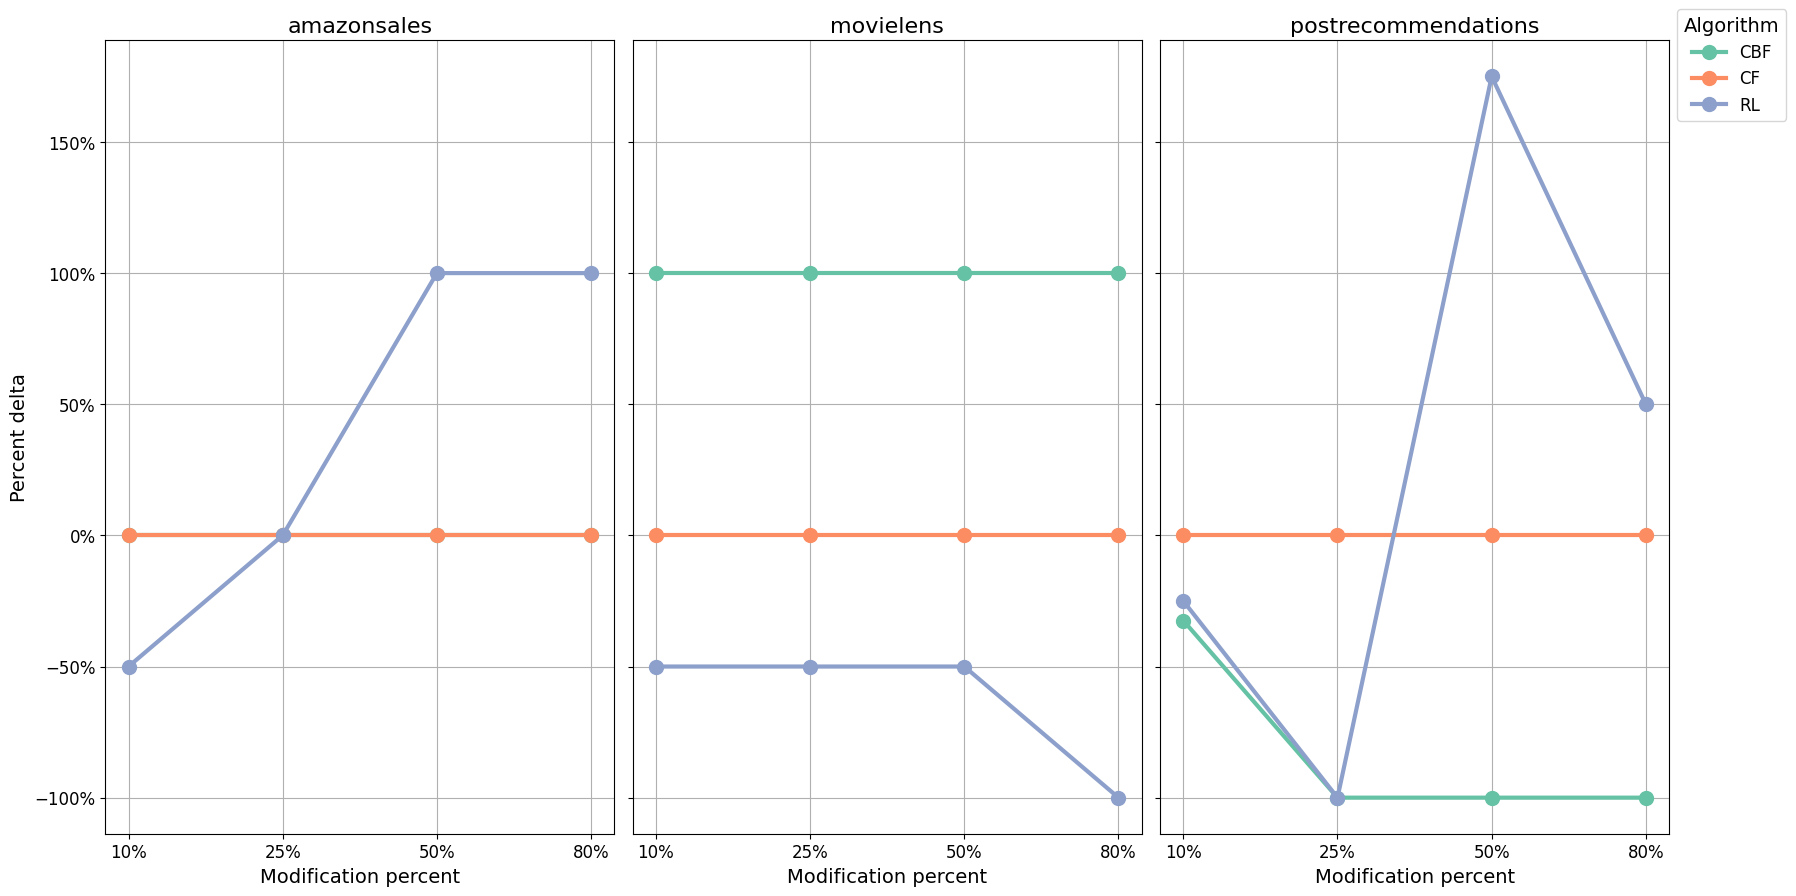

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

df = specific_df.copy()
df['combo'] = df['algorithm'] + ' - ' + df['dataset']

algorithms = df['algorithm'].unique()
datasets = df['dataset'].unique()

# Paleta Set2 z Seaborn — kolory do legendy
palette = sns.color_palette("Set2", n_colors=len(algorithms))
algorithm_colors = dict(zip(algorithms, palette))

for key in df['key'].unique():
    key_subset = df[df['key'] == key]

    fig, axes = plt.subplots(1, 3, figsize=(18, 9), sharey=True)
    
    for i, dataset in enumerate(datasets):
        ax = axes[i]
        dataset_subset = key_subset[key_subset['dataset'] == dataset]

        for alg in algorithms:
            alg_subset = dataset_subset[dataset_subset['algorithm'] == alg]
            base_color = algorithm_colors[alg]

            ax.plot(
                alg_subset['percent'],
                alg_subset['percent_delta'],
                marker='o',
                label=alg,
                color=base_color,
                linewidth=3,    # pogrubienie linii
                markersize=10   # powiększenie kropek
            )

        ax.set_title(f"{dataset}", fontsize=16)
        ax.set_xlabel("Modification percent", fontsize=14)
        ax.tick_params(axis='both', labelsize=12)
        ax.grid(True)
        ax.yaxis.set_major_formatter(PercentFormatter(1.0))
        if i == 0:
            ax.set_ylabel("Percent delta", fontsize=14)

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        title="Algorithm",
        title_fontsize=14,
        fontsize=12,
        bbox_to_anchor=(0.93, 1),
        loc='upper left'
    )

    plt.tight_layout()
    plt.subplots_adjust(right=0.93)
    if save:
        plt.savefig(f'{save_path}/fig/{key_subset}.png')
    plt.show()


In [ ]:
if not specific:
    metrics_to_plot = ['personalization', 'intra_list_dissimilarity']

    fig, axes = plt.subplots(ncols=2, figsize=(10, 6))  # bez sharey=True

    for ax, metric in zip(axes, metrics_to_plot):
        df_metric = merged_df[merged_df['key'] == metric]

        sns.barplot(
            data=df_metric,
            x='dataset',
            y='value',
            hue='algorithm',
            palette='Set2',
            ax=ax
        )

        ax.legend_.remove()

        for p, (_, row) in zip(ax.patches, df_metric.iterrows()):
            height = p.get_height()
            algo = row['algorithm']
            if not pd.isna(height):
                ax.annotate(
                    algo,
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom',
                    fontsize=10, color='black'
                )
        if metric == 'personalization':
            metric = 'Inter-diversity'
        elif metric == 'intra_list_dissimilarity':
            metric = 'Intra-list dissimilarity'
        ax.set_ylabel(metric)  # etykieta osi Y
        ax.set_xlabel('Dataset')  # etykieta osi X
        ax.set_ylim(0, 1)  # limit osi Y od 0 do 1
        ax.set_yticks([i/10 for i in range(11)])
        ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

    plt.tight_layout()
    if save:
        plt.savefig(f'{folder_path}/fig/personalization_intra_list_dissimilarity.png')
    plt.savefig(f'{folder_path}/fig/between_intra_dissimilarity.png')
    plt.show()

In [ ]:
if not specific:
    metrics_to_plot = ['item_coverage', 'user_coverage']

    fig, axes = plt.subplots(ncols=2, figsize=(10, 6))  # bez sharey=True

    for ax, metric in zip(axes, metrics_to_plot):
        df_metric = merged_df[merged_df['key'] == metric]

        sns.barplot(
            data=df_metric,
            x='dataset',
            y='value',
            hue='algorithm',
            palette='Set2',
            ax=ax
        )

        ax.legend_.remove()

        for p, (_, row) in zip(ax.patches, df_metric.iterrows()):
            height = p.get_height()
            algo = row['algorithm']
            if not pd.isna(height):
                ax.annotate(
                    algo,
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom',
                    fontsize=10, color='black'
                )
        if metric == 'item_coverage':
            metric = 'Item coverage'
        elif metric == 'user_coverage':
            metric = 'User coverage'
        ax.set_ylabel(metric)  # etykieta osi Y
        ax.set_xlabel('Dataset')  # etykieta osi X
        ax.set_ylim(0, 1)  # limit osi Y od 0 do 1
        ax.set_yticks([i/10 for i in range(11)])
        ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

    plt.tight_layout()
    if save:
        plt.savefig(f'{folder_path}/fig/item_user_coverage.png')
    plt.show()

In [ ]:
if not specific:
    metrics_to_plot = ['mae', 'rmse']

    fig, axes = plt.subplots(ncols=2, figsize=(10, 6))  # bez sharey=True

    for ax, metric in zip(axes, metrics_to_plot):
        df_metric = merged_df[merged_df['key'] == metric]

        sns.barplot(
            data=df_metric,
            x='dataset',
            y='value',
            hue='algorithm',
            palette='Set2',
            ax=ax
        )

        ax.legend_.remove()

        for p, (_, row) in zip(ax.patches, df_metric.iterrows()):
            height = p.get_height()
            algo = row['algorithm']
            if not pd.isna(height):
                ax.annotate(
                    algo,
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom',
                    fontsize=10, color='black'
                )
        if metric == 'mae':
            metric = 'MAE'
        elif metric == 'rmse':
            metric = 'RMSE'
        ax.set_ylabel(metric)  # etykieta osi Y
        ax.set_xlabel('Dataset')  # etykieta osi X
        ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

    plt.tight_layout()
    if save:
        plt.savefig(f'{folder_path}/fig/mae_rmse.png')
    plt.show()

In [ ]:
if not specific:
    metrics_to_plot = ['mrr', 'ndcg_at_k']

    fig, axes = plt.subplots(ncols=2, figsize=(10, 6))  # bez sharey=True

    for ax, metric in zip(axes, metrics_to_plot):
        df_metric = merged_df[merged_df['key'] == metric]

        sns.barplot(
            data=df_metric,
            x='dataset',
            y='value',
            hue='algorithm',
            palette='Set2',
            ax=ax
        )

        ax.legend_.remove()

        for p, (_, row) in zip(ax.patches, df_metric.iterrows()):
            height = p.get_height()
            algo = row['algorithm']
            if not pd.isna(height):
                ax.annotate(
                    algo,
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom',
                    fontsize=10, color='black'
                )
        ax.set_ylim(0, 1)
        if metric == 'ndcg_at_k':
            metric='NDCG'
        elif metric == 'mrr':
            metric='MRR'
        ax.set_ylabel(metric)  # etykieta osi Y
        ax.set_xlabel('Dataset')  # etykieta osi X
        ax.set_ylim(0, 1)  # limit osi Y od 0 do 1
        ax.set_yticks([i/10 for i in range(11)])
        ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

    plt.tight_layout()
    if save:
        plt.savefig(f'{folder_path}/fig/mrr_ndcg.png')
    plt.show()

In [ ]:
if not specific:
    fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=False)

    df_precision = merged_df[merged_df['key'] == 'precision']
    df_precision_at_k = merged_df[merged_df['key'] == 'precision_at_k']

    ax = axes[0]
    sns.barplot(
        data=df_precision,
        x='dataset',
        y='value',
        hue='algorithm',
        palette='Set2',
        ax=ax
    )
    ax.legend_.remove()

    handles, labels = ax.get_legend_handles_labels()
    bar_colors = [patch.get_facecolor() for patch in handles]
    algo_colors = dict(zip(labels, bar_colors))

    for p, (_, row) in zip(ax.patches, df_precision_at_k.iterrows()):
        height = p.get_height()
        algo = row['algorithm']
        if not pd.isna(height):
            base_color = algo_colors.get(algo, (0.5, 0.5, 0.5, 1.0))
            lighter_color = mcolors.to_rgba(base_color)
            lighter_rgb = mcolors.to_rgb(lighter_color[:3])
            lighter_rgb = mcolors.to_rgba([min(1, c + 0.4*(1-c)) for c in lighter_rgb])

            ax.bar(
                p.get_x() + p.get_width() / 2,
                row['value'] - height,
                width=p.get_width(),
                bottom=height,
                align='center',
                color=lighter_rgb,
                edgecolor='none'
            )
            ax.annotate(
                algo,
                (p.get_x() + p.get_width() / 2, row['value']),
                ha='center', va='bottom',
                fontsize=10, color='black'
            )
    ax.set_ylabel('Precision')
    ax.set_xlabel('Dataset')
    ax.set_ylim(0, 1)
    ax.set_yticks([i/10 for i in range(11)])
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

    # Recall plot
    df_recall = merged_df[merged_df['key'] == 'recall']
    df_recall_at_k = merged_df[merged_df['key'] == 'recall_at_k']

    ax = axes[1]
    sns.barplot(
        data=df_recall,
        x='dataset',
        y='value',
        hue='algorithm',
        palette='Set2',
        ax=ax
    )
    ax.legend_.remove()

    handles, labels = ax.get_legend_handles_labels()
    bar_colors = [patch.get_facecolor() for patch in handles]
    algo_colors = dict(zip(labels, bar_colors))

    for p, (_, row) in zip(ax.patches, df_recall_at_k.iterrows()):
        height = p.get_height()
        algo = row['algorithm']
        if not pd.isna(height):
            base_color = algo_colors.get(algo, (0.5, 0.5, 0.5, 1.0))
            lighter_color = mcolors.to_rgba(base_color)
            lighter_rgb = mcolors.to_rgb(lighter_color[:3])
            lighter_rgb = mcolors.to_rgba([min(1, c + 0.4*(1-c)) for c in lighter_rgb])

            ax.bar(
                p.get_x() + p.get_width() / 2,
                row['value'] - height,
                width=p.get_width(),
                bottom=height,
                align='center',
                color=lighter_rgb,
                edgecolor='none'
            )
            ax.annotate(
                algo,
                (p.get_x() + p.get_width() / 2, row['value']),
                ha='center', va='bottom',
                fontsize=10, color='black'
            )
    ax.set_ylabel('Recall')
    ax.set_xlabel('Dataset')
    ax.set_ylim(0, 1)
    ax.set_yticks([i/10 for i in range(11)])
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

    plt.tight_layout()
    if save:
        plt.savefig(f'{folder_path}/fig/precision_recall.png')
    plt.show()